In [60]:
%matplotlib inline
from chmp.ds import reload

import base64
import io

from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt

import importlib
reload('hexworld.fov', 'hexworld')
import hexworld
import hexworld.fov

In [2]:
b = hexworld.Int64Buffer(21, 10)
b[2, 4] = 2

In [3]:
print(hexworld.show(b))

 ___     ___     ___     ___     ___     ___     ___     ___     ___     ___     ___     
/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___ 
\___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/   \
/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/
\___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/   \
/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/
\___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/   \
/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/
\___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/   \
/ 0 \___/ 2 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/
\___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/   \
/ 0 \___/ 

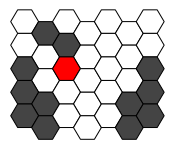

In [4]:
hexworld.plot(hexworld.fov.occlusion_maps[2, 2], colors={
    0: '#ffffff', 
    1: '#444444',
    2: '#ff0000',
})

In [102]:
import ipywidgets as widgets
from traitlets import Unicode, validate


class KeyHandler(widgets.DOMWidget):
    _view_name = Unicode('KeyHandler').tag(sync=True)
    _view_module = Unicode('chmp.hexworld').tag(sync=True)
    _view_module_version = Unicode('0.1.0').tag(sync=True)

In [103]:
%%javascript
require.undef('chmp.hexworld');

define('chmp.hexworld', ["@jupyter-widgets/base"], function(widgets) {
    return {
        KeyHandler: widgets.DOMWidgetView.extend({
            render: function() {
                this.el.style.cssText = [
                    'width: 10em;', 
                    'height: 1em;', 
                    'background-color: #555;', 
                    'color: #fff;', 
                    'text-align: center;',
                ].join(' ');
                this.el.innerHTML = 'Click to focus!';
                this.el.tabIndex = 1;
                
                // TODO: make message customizable?
                this.el.addEventListener('focus', function() {
                    this.el.innerHTML = 'Move with arrow keys';
                }.bind(this));
                
                this.el.addEventListener('blur', function() {
                    this.el.innerHTML = 'Click to focus!';
                }.bind(this));
                
                this.el.addEventListener('keypress', function(ev) {
                    console.log(ev.key);
                    ev.preventDefault();
                    this.send({'type': 'keypress', 'key': ev.keyCode});
                }.bind(this));
            },
        })
    };
});

<IPython.core.display.Javascript object>

In [104]:
from ipywidgets import VBox, Image

In [105]:
key_handler = KeyHandler()
image = Image()

n = 0
p0 = hexworld.to_cube(hexworld.OffsetPoint(10, 4))

@key_handler.on_msg
def update(_, ev, __):
    if ev.get('type') != 'keypress':
        return
    
    global n, p0
    
    if ev['key'] == 37:
        n -= 1
    
    if ev['key'] == 39:
        n += 1
    
    if ev['key'] == 38:
        p0 = p0 + hexworld.rotate(hexworld.CubePoint(0, +1, -1), n)
    
    if ev['key'] == 40:
        p0 = p0 - hexworld.rotate(hexworld.CubePoint(0, +1, -1), n)
    
    draw()
    

def draw():
    dp = hexworld.rotate(hexworld.CubePoint(0, +1, -1), n)
    dt = hexworld.rotate(dp, +1)
    du = hexworld.rotate(dp, -1)

    b = hexworld.Int64Buffer(21, 10)

    for i in range(4):
        b[p0 + i * dp] = 1

        for j in range(1, 4):
            np = (j + j % 2) // 2
            ns = j // 2

            b[p0 + i * dp + np * dt - ns * du] = 1
            b[p0 + i * dp + np * du - ns * dt] = 1

    b[p0] = 2

    hexworld.plot(b, colors={0: 'w', 1: 'r', 2: 'b'})

    fobj = io.BytesIO()
    plt.savefig(fobj, format='png')
    plt.close()

    image.value = fobj.getvalue()
    
w = VBox([key_handler, image])
draw()

In [106]:
w

VBox(children=(KeyHandler(), Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02@\x00\x00\x01G\x08\x06\x00\x00\x00Iw\xf3\x13\x00\x00\x00\x04sBIT\x08\x08\x08\x08|\x08d\x88\x00\x00\x00\tpHYs\x00\x00\x0b\x12\x00\x00\x0b\x12\x01\xd2\xdd~\xfc\x00\x00\x009tEXtSoftware\x00matplotlib version 2.1.1, http://matplotlib.org/\x00\xe6O\x9b\x00\x00 \x00IDATx\x9c\xec\x9dy|\x8c\xd7\xf7\xc7\xcf3A;\xcf\xcc$\xb2K"!\x89-\xc4\x96Xk/E\xd5^J\xab\x96\x16-\xda\xfa\xb6\xd6\xaa(\xd5\xda\x8aj-\xb5+j\xa9ZJU\xabJQ;\xb5\xef\xbb\xd4\x12\x04\x91\x10\x91e\xe6\xf3\xfbc\xcc\xaf&Q\xc9<\xcf\xb9!/\xf7\xfdz\xdd?\xcfg>\xcc\xf2\x9c\xdc{\xcf9\n\x00\x90D"\x91H$\x12\xc93\x84\xe1I\x1b\x90H$\x12\x89D"\xc9md\x02$\x91H$\x12\x89\xe4\x99C&@\x12\x89D"\x91H\x9e9d\x02$\x91H$\x12\x89\xe4\x99C&@\x12\x89D"\x91H\x9e9d\x02$\x91H$\x12\x89\xe4\x99C&@\x12\x89D"\x91H\x9e9d\x02$\x91H$\x12\x89\xe4\x99C&@\x12\x89D"\x91H\x9e9d\x02$\x91H$\x12\x89\xe4\x99C&@\x12\x89D"\x91H\x9e9d\x02$\x91H$\x12\x89\xe4\x99C&@\x12\x89D"\x91H\x9e9d\x02$\x91H$\x12\x89\xe4\x99C&@\x12\x89D"\x91H\x9e9d\x02$\x91H$\x12\x89\xe4\x99C&@\x12\x89D"\x91H\x9e9d\x02$\x91H$\x12\x89\xe4\x99C&@\x12\x89D"\x91H\x9e9d\x02$\x91H$\x12\x89\xe4\x99C&@\x12\x89D"\x91H\x9e9d\x02$\x91H$\x12\x89\xe4\x99C&@\x12\x89D"\x91H\x9e9d\x02$\x91H$\x12\x89\xe4\x99C&@\x12\x89D"\x91H\x9e9d\x02$\x91H$\x12\x89\xe4\x99C&@\x12\x89D"\x91H\x9e9d\x02$\x91H$\x12\x89\xe4\x99C&@\x12\x89D"\x91H\x9e9d\x02$\x91H$\x12\x89\xe4\x99C&@\x12\x89D"\x91H\x9e9d\x02$\x91H$\x12\x89\xe4\x99C&@\x12\x89D"\x91H\x9e9d\x02$\x91H$\x12\x89\xe4\x99C&@\x12\x89D"\x91H\x9e9d\x02$\x91H$\x12\x89\xe4\x99C&@\x12\x89D"\x91H\x9e9\xf2=i\x03y\x95\xbf\xfe\xfa\x8b\x96.]\xaa)\xb6k\xd7\xaeT\xa1B\x05fG\x8ff\xd9\xb2e\xb4y\xf3f\x97\xe3\xdc\xdc\xdc\xa8o\xdf\xbe\x14\x1c\x1c,\xc0UV\xbe\xfd\xf6[:~\xfc\xb8\xcbq\xaa\xaaRLL\x0cY,\x16\x01\xae\x9c\xb1Z\xad4b\xc4\x08\x8a\x8f\x8fw9\xd6\xd7\xd7\x97\x06\x0f\x1eLnnn\x02\x9c9\x93\x94\x94D#F\x8c\xa0{\xf7\xee\xb9\x1c\x1b\x11\x11A\xbdz\xf5\x12\xe0*+\x17/^\xa4\xf1\xe3\xc7\x93\xd5ju9\xb6N\x9d:\xd4\xa6M\x1b\x01\xae\xb2r\xe0\xc0\x01\x9a={\xb6\xa6\xd8\xb6m\xdbR\xed\xda\xb5\x99\x1d=\x9a?\xfe\xf8\x83~\xfe\xf9g\x97\xe3\x14E\xa1\x9e={RDD\x84\x00WYY\xb0`\x01\xed\xda\xb5\xcb\xe5\xb8\xfc\xf9\xf3\xd3\xc0\x81\x03\xc9\xdf\xdf_\x80\xab\xacL\x980\x81\xce\x9d;\xe7r\x9c\xc5b\xa1!C\x86\x90\xd1h\x14\xe0\xca\x99\xb4\xb44\xfa\xfc\xf3\xcf\xe9\xf6\xed\xdb.\xc7\x06\x05\x05\xd1\xc0\x81\x03IQ\x14\x01\xce\xf2\x06\n\x00<i\x13y\x8d\xa4\xa4$\x8a\x88\x88\xa0\x9e={\x92\x87\x87\x87K\xb1\x97.]\xa25k\xd6\xd0\xfe\xfd\xfb)\x7f\xfe\xfc\x82\x1c\xda9w\xee\x1cU\xa9R\x85bbb\\~\xf0\xee\xdd\xbb\x97n\xdd\xba\xa5\xe9\x07\xd5U6m\xdaD\x9d;w\xa6~\xfd\xfa\xb9\x1c\xfb\xdbo\xbfQ\x992eh\xec\xd8\xb1\x02\x9c93c\xc6\x0c\x9a9s&u\xea\xd4\xc9\xe5\xd8\xf9\xf3\xe7\xd3;\xef\xbcC\xdd\xbbw\x17\xe0\xcc\x99~\xfd\xfa\xd1\xf1\xe3\xc7\xa9q\xe3\xc6.\xc7\x8e\x1b7\x8e\xe6\xcf\x9fOu\xea\xd4\x11\xe0\xcc\x99f\xcd\x9a\x91\x8f\x8f\x0fEEE\xb9\x14g\xb5Z\xe9\x8b/\xbe\xa0\xdd\xbbwSXX\x98 wv\xd2\xd3\xd3\xa9B\x85\n\xd4\xb4iS*\\\xb8\xb0K\xb1\x89\x89\x894u\xeaT:q\xe2\x84\xf0\x04\xfd\xe6\xcd\x9bT\xbati\xea\xd3\xa7\x0f\xa9\xaa\xeaR\xec\x993gh\xc7\x8e\x1d\xb4s\xe7N2\x18\xc4\x1e\n\x1c=z\x94\xea\xd5\xabG111.?x\xb7o\xdfN\x06\x83\x81\x16.\\(\xc8\xdd\xbf\xfc\xf2\xcb/\xd4\xa7O\x1f\xfa\xe0\x83\x0f\\\x8e]\xb9r%\xd5\xa9S\x87>\xfd\xf4S\x01\xce\x9c\x19?~<\xfd\xf4\xd3O\xd4\xae];\x97cg\xcc\x98A\x83\x07\x0f\xa6\xf6\xed\xdb\x0bp\x96G\x80\xc4e\xfa\xf5\xeb\x87\xce\x9d;k\x8a\xb5\xd9lx\xe9\xa5\x970a\xc2\x04^S\x8f\xa0y\xf3\xe6\x189r\xa4\xa6\xd8\xfb\xf7\xef\xa3x\xf1\xe2\xf8\xe5\x97_\x98]9\x93\x96\x96\x86\xc8\xc8H,[\xb6LS\xfc\xd5\xabW\xe1\xe3\xe3\x83c\xc7\x8e1;s\xe6\xc6\x8d\x1b\xf0\xf3\xf3\xc3\x81\x03\x074\xc5\xef\xdf\xbf\x1f~~~\xb8y\xf3&\xb33g\x8e\x1e=\n\x1f\x1f\x1f\\\xbbvMS\xfc\xd2\xa5K\x11\x19\x19\x89\xf4\xf4tfg\xce\xac^\xbd\x1a\xc5\x8b\x17\xc7\xfd\xfb\xf75\xc5\x8f\x181\x02-Z\xb4`v\x95\x95\xaf\xbe\xfa\n\r\x1b6\x84\xcdf\xd3\x14\xdf\xa9S\'\xf4\xef\xdf\x9f\xd9UVz\xf4\xe8\x81\xf7\xdf\x7f_S\xac\xd5jE\xf5\xea\xd51k\xd6,fW\xce\xd8l6\xd4\xabW\x0f\x93&M\xd2\x14\x7f\xf7\xee]\x04\x